In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [21]:
x_train = x_train / 255.0
x_test = x_test / 255.0

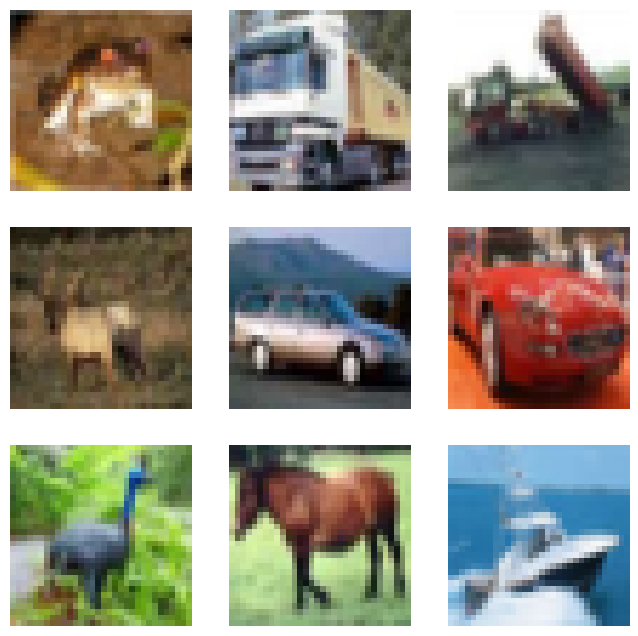

In [22]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.axis("off")
plt.show()

In [23]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

In [24]:
model = keras.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 124ms/step - accuracy: 0.2956 - loss: 1.8845 - val_accuracy: 0.4998 - val_loss: 1.3697
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.4915 - loss: 1.4150 - val_accuracy: 0.5661 - val_loss: 1.2080
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 123ms/step - accuracy: 0.5347 - loss: 1.2880 - val_accuracy: 0.5905 - val_loss: 1.1434
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.5735 - loss: 1.1984 - val_accuracy: 0.6073 - val_loss: 1.1016
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.6030 - loss: 1.1288 - val_accuracy: 0.6220 - val_loss: 1.0502
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.6153 - loss: 1.0885 - val_accuracy: 0.6554 - val_loss: 0.9877
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 96s 123ms/step - accuracy: 0.6323 - loss: 1.0431 - val_accuracy: 0.6531 - val_loss: 0.9989
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.6477 - loss:

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6964 - loss: 0.8731
Test Accuracy: 0.6929000020027161


In [28]:
predictions = model.predict(x_test)

predicted_class = np.argmax(predictions[0])
print("Predicted Class:", predicted_class)
print("Actual Class:", y_test[0][0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Predicted Class: 3
Actual Class: 3


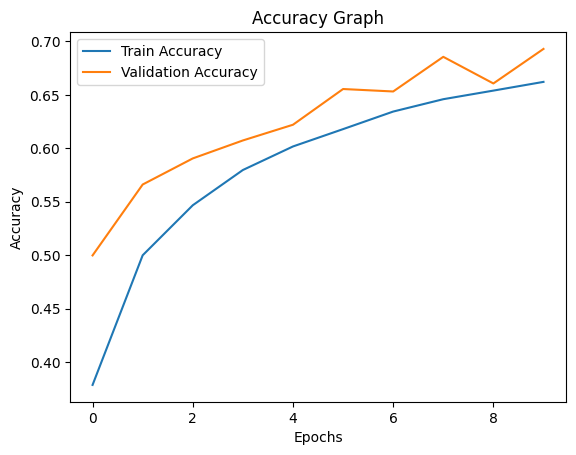

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()